In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from numpy import mean
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
data = pd.read_csv('spectra_blups.csv')
data= data.loc[data['Rep'] == 1, :]
data.reset_index(inplace= True)
#data  = data.loc[data['Trt']== 'HN', :]

In [39]:
data.head()

,index,genotype,PLOT.ID,rows,ranges,Block,Rep,Trt,year,note,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
0,1,B73,1310,10,7,1,1,HN,2022,BGEM_Tall_early,...,0.047911,0.047712,0.04755,0.047396,0.047235,0.047119,0.047004,0.046864,0.046733,0.046579
1,3,B73,1139,39,3,1,1,HN,2022,BGEM_Short_early,...,0.047911,0.047712,0.04755,0.047396,0.047235,0.047119,0.047004,0.046864,0.046733,0.046579
2,6,B73,1008,8,1,1,1,HN,2022,BGEM_Tall_late,...,0.047911,0.047712,0.04755,0.047396,0.047235,0.047119,0.047004,0.046864,0.046733,0.046579
3,9,B73,1293,43,6,1,1,HN,2022,BGEM_Short_late,...,0.047911,0.047712,0.04755,0.047396,0.047235,0.047119,0.047004,0.046864,0.046733,0.046579
4,13,B73,1041,41,1,1,1,HN,2022,BGEM_Short_early,...,0.047911,0.047712,0.04755,0.047396,0.047235,0.047119,0.047004,0.046864,0.046733,0.046579


In [40]:
data.columns[0:15]

Index(['index', 'genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'note', 'Group', 'Calibration', 'ASD', 'X350', 'X351'],
      dtype='object')

In [41]:
data['Group']

0      Inbred
1      Inbred
2      Inbred
3      Inbred
4      Inbred
        ...  
595    Hybrid
596    Hybrid
597    Hybrid
598    Hybrid
599    Hybrid
Name: Group, Length: 600, dtype: object

In [42]:
data[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']] = data[['genotype', 'PLOT.ID', 'rows', 'ranges', 'Block', 'Rep', 'Trt', 'year',
       'note', 'Group', 'Calibration', 'ASD']].astype('category')

In [43]:
position_350 = data.columns.get_loc('X350')
position_2500 = data.columns.get_loc('X2500') + 1 
X = data.iloc[:, position_350 : position_2500]

In [44]:
group2 = []
for i in data['Group']:
    if i == 'Hybrid':
        group2.append(1)
    else:
        group2.append(2)

In [45]:
np.unique(data['note'])

array(['BGEM_Short_early', 'BGEM_Short_late', 'BGEM_Tall_early',
       'BGEM_Tall_late', 'Hybrid'], dtype=object)

In [46]:
note2 = []
for i in data['note']:
    if i == 'BGEM_Short_early':
        note2.append(1)
    elif i ==  'BGEM_Short_late':
        note2.append(2)
    elif i == 'BGEM_Tall_early':
        note2.append(3)
    elif i == 'BGEM_Tall_late':
        note2.append(4)
    else:
        note2.append(5)
    

In [47]:
data.insert(8, 'note2', note2)

In [48]:
data.insert(8, 'Group2' , group2)

In [49]:
group2

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,


In [50]:
y = data.loc[:, 'Group']

In [51]:
random_state = 2
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=random_state)

In [52]:
SVC_model = svm.SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression()

In [53]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)


LogisticRegression()

In [54]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logreg_prediction= logreg_model.predict(X_test)

In [55]:
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
print(accuracy_score(logreg_prediction, y_test))

0.5888888888888889
0.8777777777777778
0.7944444444444444


In [56]:
steps = [('svd', TruncatedSVD(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.857 (0.041)


In [62]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.941 (0.034)


In [58]:
from sklearn.manifold import Isomap
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.864 (0.038)


In [59]:
from sklearn.manifold import LocallyLinearEmbedding
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.836 (0.051)


In [60]:
from sklearn.manifold import LocallyLinearEmbedding
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('m', KNeighborsClassifier(n_neighbors=1))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: nan (nan)


In [418]:
PCA_blups = PCA(n_components=2)
principal_comp = PCA_blups.fit_transform(X)

In [379]:
principal_blups_Df = pd.DataFrame(data = principal_comp
             , columns = ['principal component 1', 'principal component 2'])

In [380]:
print('Explained variation per principal component: {}'.format(PCA_blups.explained_variance_ratio_))

Explained variation per principal component: [0.83036661 0.12218093]


<Figure size 432x288 with 0 Axes>

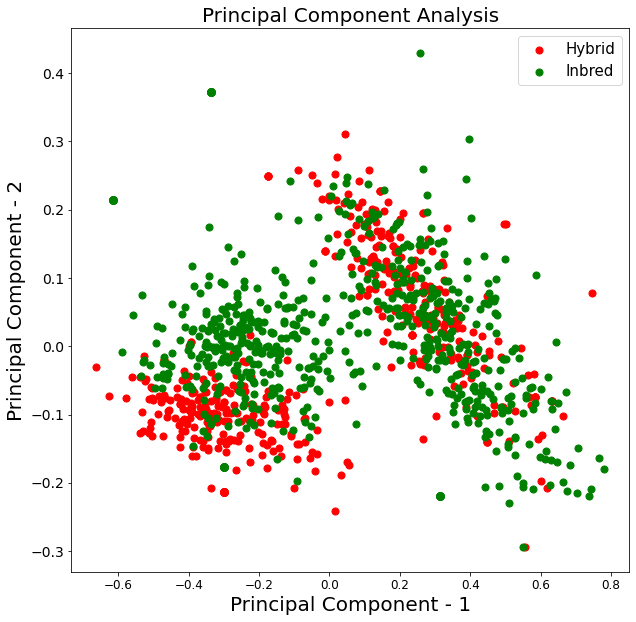

In [381]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['Hybrid', 'Inbred']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['Group'] == target
    plt.scatter(principal_blups_Df.loc[indicesToKeep, 'principal component 1']
               , principal_blups_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [310]:
data['Group']

1       Inbred
3       Inbred
6       Inbred
9       Inbred
13      Inbred
         ...  
1192    Hybrid
1193    Hybrid
1196    Hybrid
1197    Hybrid
1199    Hybrid
Name: Group, Length: 600, dtype: category
Categories (2, object): ['Hybrid', 'Inbred']

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

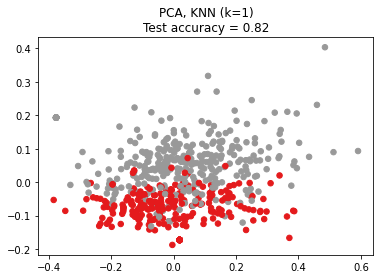

<Figure size 432x288 with 0 Axes>

In [285]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 1
random_state = 1

data2 = data#.loc[data['Trt'] == 'HN']

position_350 = data2.columns.get_loc('X350')
position_2500 = data2.columns.get_loc('X2500') + 1 
X = data2.iloc[:, position_350 : position_2500]
X = X.to_numpy()
y = data2.loc[:, 'Group2']
y= y.to_numpy()



# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(PCA(n_components=2, random_state=random_state))
#pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
#lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
lda = make_pipeline(LinearDiscriminantAnalysis(n_components=2))


# Reduce dimension to 2 with NeighborhoodComponentAnalysis
#nca = make_pipeline(StandardScaler(),NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),)
nca = make_pipeline(NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca),('LDA', lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    #plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y , s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

In [47]:
data2

,genotype,PLOT.ID,rows,ranges,Block,Rep,Trt,year,note2,note,...,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
1202,B73,2016,16,1,2,1,LN,2022,1,BGEM_Short_early,...,0.051820,0.051603,0.051402,0.051240,0.051043,0.050828,0.050653,0.050506,0.050352,0.050252
1204,B73,2114,14,3,2,1,LN,2022,1,BGEM_Short_early,...,0.051820,0.051603,0.051402,0.051240,0.051043,0.050828,0.050653,0.050506,0.050352,0.050252
1208,B73,2131,31,3,2,1,LN,2022,4,BGEM_Tall_late,...,0.051820,0.051603,0.051402,0.051240,0.051043,0.050828,0.050653,0.050506,0.050352,0.050252
1210,B73,2386,36,8,2,1,LN,2022,5,Hybrid,...,0.051820,0.051603,0.051402,0.051240,0.051043,0.050828,0.050653,0.050506,0.050352,0.050252
1212,B73,2082,32,2,2,1,LN,2022,4,BGEM_Tall_late,...,0.051820,0.051603,0.051402,0.051240,0.051043,0.050828,0.050653,0.050506,0.050352,0.050252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,PHZ51 X LH123,2572,22,12,2,1,LN,2022,5,Hybrid,...,0.052845,0.052648,0.052397,0.052163,0.051977,0.051794,0.051653,0.051523,0.051338,0.051129
2394,PHZ51 X PHG35,2542,42,11,2,1,LN,2022,5,Hybrid,...,0.056339,0.056124,0.055936,0.055762,0.055575,0.055415,0.055183,0.054846,0.054671,0.054582
2396,PHZ51 X PHG35,2506,6,11,2,1,LN,2022,5,Hybrid,...,0.056339,0.056124,0.055936,0.055762,0.055575,0.055415,0.055183,0.054846,0.054671,0.054582
2398,PHZ51 X PHG35,2500,50,10,2,1,LN,2022,5,Hybrid,...,0.056339,0.056124,0.055936,0.055762,0.055575,0.055415,0.055183,0.054846,0.054671,0.054582


In [184]:
y = np.array(y)
y

array(['Inbred', 'Inbred', 'Inbred', ..., 'Hybrid', 'Hybrid', 'Hybrid'],
      dtype=object)

In [189]:
X = X.to_numpy()

In [91]:
X_embedded

array([[-0.17004991, -0.21534674],
       [-0.17004991, -0.21534674],
       [-0.17004991, -0.21534674],
       ...,
       [-0.36226566,  0.16838111],
       [-0.36226566,  0.16838111],
       [-0.36226566,  0.16838111]])